# 2.0 - Análisis exploratorio y visualizaciones

**Objetivo:**  
Analizar el dataset integrado de centolla, esfuerzo pesquero, temperatura y regulaciones.  
Generar gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles relaciones entre variables.

**Proyecto:** Predicción de volumen sostenible de centolla  
**Autor:** Rafael Mamani  
**Fecha:** 18/6/25

## Montar Google Drive y ubicarse en el directorio del proyecto

Monto Google Drive y navego a la carpeta del repositorio para acceder al dataset procesado.

In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ProyCentolla/PCentolla

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ProyCentolla/PCentolla


## Cargar el dataset final integrado

Cargo el archivo `dataset_modelado_final.csv` para realizar el análisis exploratorio.

In [5]:
import pandas as pd

df = pd.read_csv('data/processed/dataset_modelado_final.csv')
df.head()

,ESPECIE,Año,Total,Mes,volumen_centolla,Puerto,area_geografica,tipo_arte,horas_pesca,embarcaciones_activas,temp_promedio,veda_centolla
0,CENTOLLA,2020,127.0,1,-,Punta Arenas,Magallanes,trampas,216,6,19.27,0
1,CENTOLLA,2020,127.0,1,-,Punta Arenas,Magallanes,trampas,216,6,17.23,0
2,CENTOLLA,2020,127.0,1,-,Punta Arenas,Magallanes,trampas,216,6,19.55,0
3,CENTOLLA,2020,127.0,1,-,Punta Arenas,Magallanes,trampas,216,6,17.28,0
4,CENTOLLA,2020,127.0,1,-,Punta Arenas,Magallanes,trampas,216,6,24.02,0


## Estadísticas descriptivas y revisión de valores faltantes

Analizo la estructura, los tipos de datos y los valores faltantes del dataset.

In [7]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ESPECIE                784 non-null    object 
 1   Año                    784 non-null    int64  
 2   Total                  394 non-null    float64
 3   Mes                    784 non-null    int64  
 4   volumen_centolla       394 non-null    object 
 5   Puerto                 784 non-null    object 
 6   area_geografica        784 non-null    object 
 7   tipo_arte              784 non-null    object 
 8   horas_pesca            784 non-null    int64  
 9   embarcaciones_activas  784 non-null    int64  
 10  temp_promedio          772 non-null    float64
 11  veda_centolla          784 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 73.6+ KB
None
               Año       Total         Mes  horas_pesca  \
count   784.000000  394.000000  784.0000

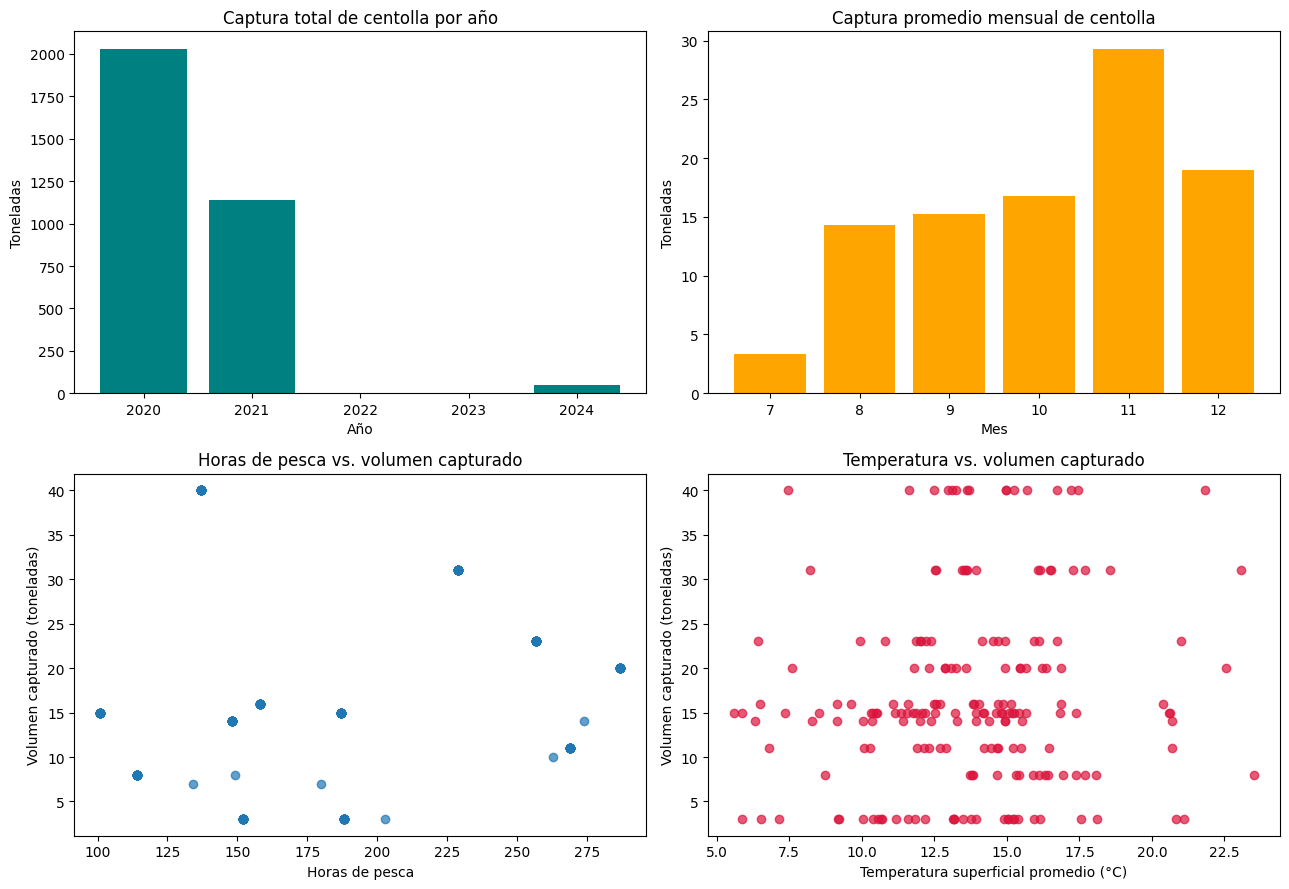

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Aseguramos que volumen_centolla sea numérico (puede tener strings vacíos)
df['volumen_centolla'] = pd.to_numeric(df['volumen_centolla'], errors='coerce')

# Creamos una figura grande con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(13, 9))

# === 1. Captura total de centolla por año (barras) ===
# Agrupa por año y suma el volumen capturado
captura_anual = df.groupby('Año')['volumen_centolla'].sum()
axs[0, 0].bar(captura_anual.index, captura_anual.values, color='teal')
axs[0, 0].set_title('Captura total de centolla por año')
axs[0, 0].set_ylabel('Toneladas')
axs[0, 0].set_xlabel('Año')

# === 2. Captura mensual promedio (barras) ===
# Agrupa por mes y calcula el promedio de captura
captura_mensual = df.groupby('Mes')['volumen_centolla'].mean()
axs[0, 1].bar(captura_mensual.index, captura_mensual.values, color='orange')
axs[0, 1].set_title('Captura promedio mensual de centolla')
axs[0, 1].set_ylabel('Toneladas')
axs[0, 1].set_xlabel('Mes')

# === 3. Relación esfuerzo pesquero vs. captura (dispersión) ===
# Muestra la relación entre horas de pesca y volumen capturado
axs[1, 0].scatter(df['horas_pesca'], df['volumen_centolla'], alpha=0.7)
axs[1, 0].set_title('Horas de pesca vs. volumen capturado')
axs[1, 0].set_xlabel('Horas de pesca')
axs[1, 0].set_ylabel('Volumen capturado (toneladas)')

# === 4. Volumen de captura vs. temperatura (dispersión) ===
# Analiza posible relación entre temperatura superficial y captura
axs[1, 1].scatter(df['temp_promedio'], df['volumen_centolla'], color='crimson', alpha=0.7)
axs[1, 1].set_title('Temperatura vs. volumen capturado')
axs[1, 1].set_xlabel('Temperatura superficial promedio (°C)')
axs[1, 1].set_ylabel('Volumen capturado (toneladas)')

# Ajusta el espacio para que los títulos no se encimen
plt.tight_layout()
plt.show()

---

## Resultados exploratorios

**1. Captura total de centolla por año:**  
El gráfico evidencia que los años 2020 y 2021 tuvieron volúmenes de captura de centolla muy superiores al resto del periodo. En particular, 2020 muestra el mayor registro. Para 2024 solo se observa una captura marginal, y no hay datos para los años 2022 y 2023. Esto puede reflejar cambios en la actividad pesquera, periodos de veda más prolongados, una baja real en la abundancia, cambios de política de manejo, o incluso faltantes en el registro de datos para esos años.

**2. Captura promedio mensual de centolla:**  
La estacionalidad es clara: los mayores volúmenes promedio se registran en los meses de octubre, noviembre y diciembre, con un pico especialmente alto en noviembre. Esto sugiere que la actividad pesquera de centolla en Punta Arenas se concentra en los últimos meses del año, probablemente después de la veda biológica y coincidiendo con la temporada habilitada de captura.

**3. Horas de pesca vs. volumen capturado:**  
El gráfico de dispersión sugiere una relación positiva entre el esfuerzo (horas de pesca) y el volumen capturado, aunque la dispersión indica que no siempre un mayor esfuerzo implica mayor captura. Existen puntos con muchas horas de pesca y volúmenes bajos, y viceversa, lo que podría deberse a variaciones en la abundancia de centolla, condiciones climáticas, o eficiencia de la flota.

**4. Temperatura superficial promedio vs. volumen capturado:**  
No se observa una tendencia clara entre la temperatura del mar y el volumen capturado de centolla. Los puntos están dispersos en todo el rango de temperatura, lo que sugiere que la temperatura superficial promedio no es el principal factor explicativo de las fluctuaciones en el volumen de captura para este periodo y región, o bien que su efecto podría ser indirecto o estar enmascarado por otros factores (como esfuerzo pesquero o regulaciones).

---

Estos resultados sugieren que la captura de centolla en Punta Arenas tiene una marcada estacionalidad y una fuerte variabilidad interanual. El esfuerzo pesquero tiene cierta relación con el volumen capturado, pero otros factores (regulaciones, clima, dinámica poblacional) probablemente también juegan un papel relevante.  
Será útil profundizar en análisis de regresión o modelos predictivos para comprender mejor las relaciones entre las variables y evaluar el impacto de la veda y las regulaciones sobre la sostenibilidad de la pesquería.

---

## Análisis del impacto de la veda en la captura de centolla

La veda biológica es una herramienta clave para la gestión sostenible de la pesquería.  
A continuación se compara el volumen de captura de centolla durante los meses en que la veda está activa (`veda_centolla = 1`) y los meses sin veda (`veda_centolla = 0`).


/tmp/ipython-input-13-2766168359.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Veda', y='volumen_centolla', data=df_plot, palette='Set2')


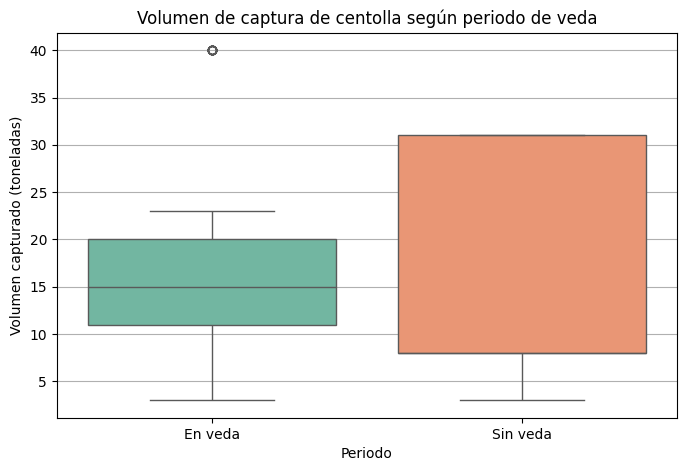

Promedio de captura sin veda: 19.00 toneladas
Promedio de captura en veda: 15.80 toneladas


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos una columna descriptiva para mayor claridad
df['Veda'] = df['veda_centolla'].map({0: 'Sin veda', 1: 'En veda'})

# Filtramos solo filas con datos de captura
df_plot = df[df['volumen_centolla'].notnull()]

plt.figure(figsize=(8, 5))
sns.boxplot(x='Veda', y='volumen_centolla', data=df_plot, palette='Set2')
plt.title('Volumen de captura de centolla según periodo de veda')
plt.xlabel('Periodo')
plt.ylabel('Volumen capturado (toneladas)')
plt.grid(axis='y')
plt.show()

# Mostrar también promedios para interpretación
promedio_sin_veda = df_plot[df_plot['veda_centolla']==0]['volumen_centolla'].mean()
promedio_veda = df_plot[df_plot['veda_centolla']==1]['volumen_centolla'].mean()
print(f"Promedio de captura sin veda: {promedio_sin_veda:.2f} toneladas")
print(f"Promedio de captura en veda: {promedio_veda:.2f} toneladas")

---

### Impacto de la veda sobre la captura de centolla

El boxplot compara el volumen de captura de centolla entre meses con veda activa (“En veda”) y meses habilitados para la pesca (“Sin veda”).  
Se observa que el **promedio de captura en meses sin veda es de 19 toneladas**, mientras que durante la veda el promedio baja a 15,8 toneladas.  
Aunque la diferencia existe y es relevante, aún se registran capturas durante la veda, lo que podría explicarse por:

- Permisos de pesca especiales,
- Errores o rezagos en el registro de datos,
- Ocasional incumplimiento de la normativa.

Sin embargo, la mayor dispersión y volumen en los meses habilitados muestra que la veda cumple su función de restringir la extracción y concentrar la mayor parte del esfuerzo pesquero en los periodos permitidos.

El análisis refuerza la importancia de la veda biológica como herramienta de manejo, pero también sugiere la necesidad de seguir monitoreando el cumplimiento para asegurar la sostenibilidad de la pesquería.

---